# 1. Load Data

-----------

In [50]:
#installing the necessary libraries
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Data_Collection\spotify_christmas_streams_kworb_2017_2025.csv') #loads dataset data
df.head() #shows first 5

,date,track,artist,streams,day_of_week,week_of_year
0,2017-11-16,All I Want for Christmas Is You,Mariah Carey,3821572,Thursday,46
1,2017-11-23,All I Want for Christmas Is You,Mariah Carey,6130250,Thursday,47
2,2017-11-23,Last Christmas,Wham!,4040197,Thursday,47
3,2017-11-30,All I Want for Christmas Is You,Mariah Carey,11641888,Thursday,48
4,2017-11-30,It's Beginning to Look a Lot Like Christmas,Michael Bublé,4577042,Thursday,48


In [53]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  #pd.to_datetime converts to date
df['date'].dtype #<M8[ns] is NumPy's internal format for datetime64 with nanosecond precision.

dtype('<M8[ns]')

# 2. Complete Time Series Analysis (2017-2025)

-----------

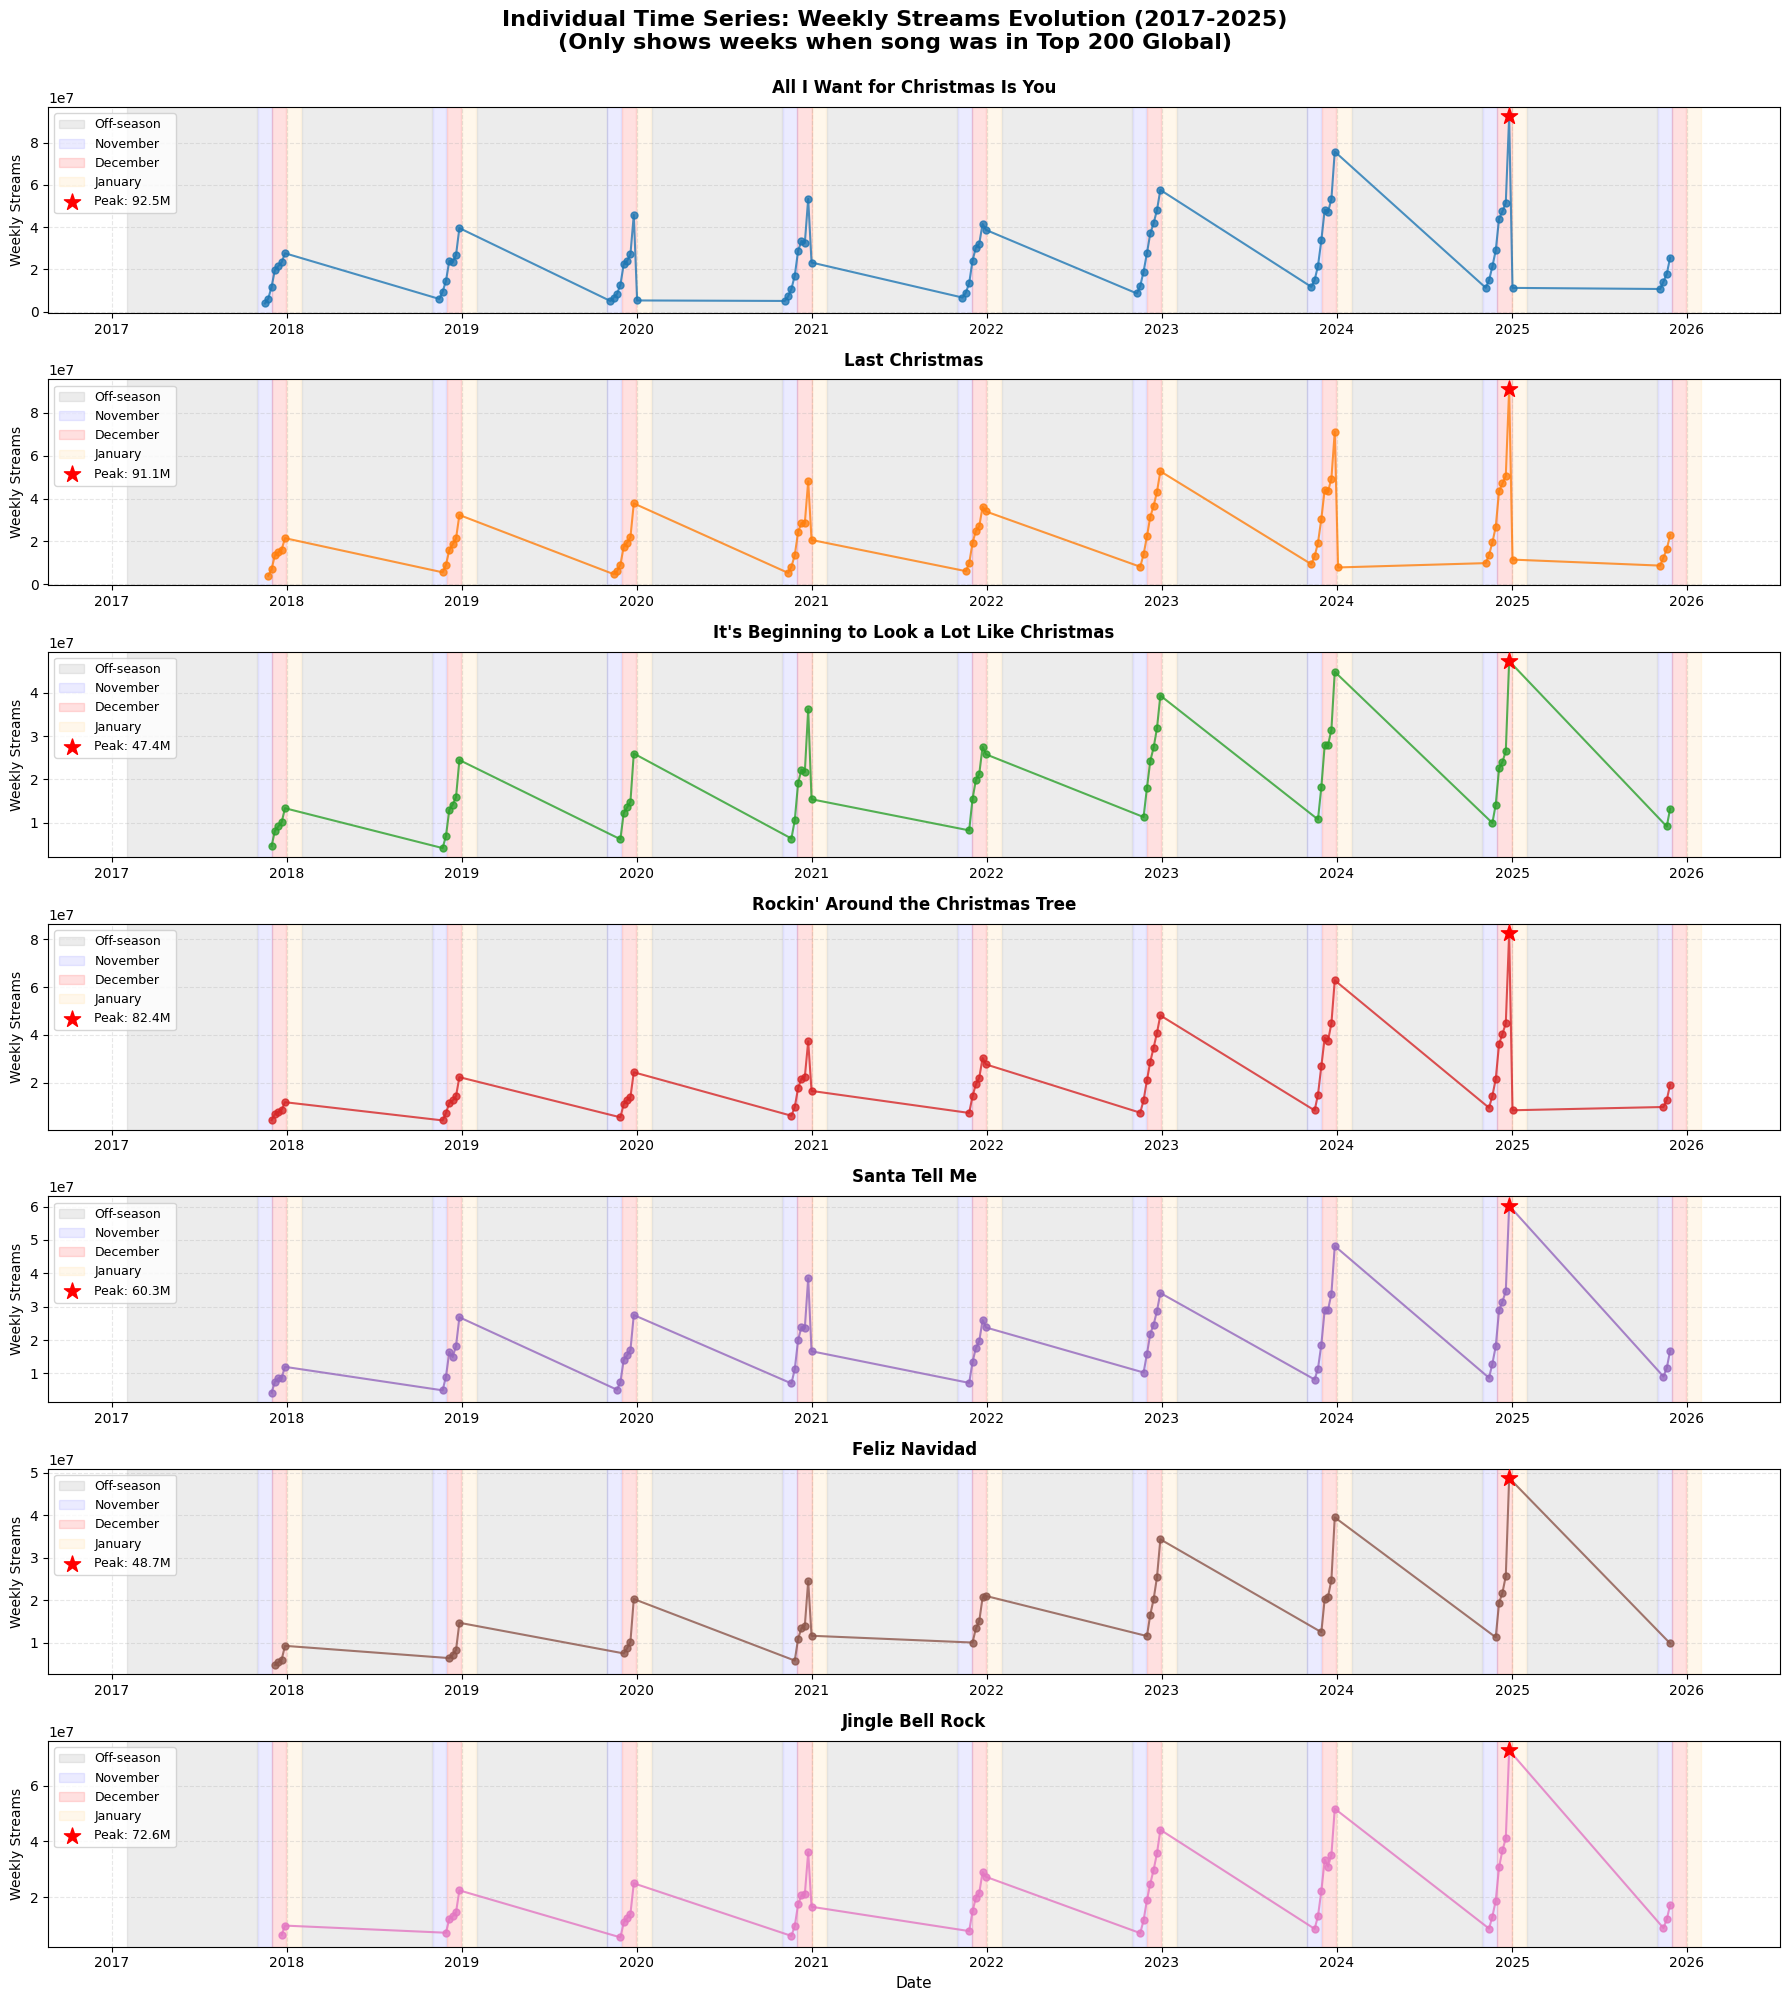

In [54]:
fig, axes = plt.subplots(7, 1, figsize=(18, 20)) #Individual time series analysis for each song
songs = df['track'].unique() #check which songs appear
colors = plt.cm.tab10(range(len(songs))) #plot color for each image

for idx, song in enumerate(songs): #for all songs
    song_data = df[df['track'] == song].sort_values('date') #check tracks for each song and sort by date
    
    # Plot with line connection AND markers
    axes[idx].plot(song_data['date'], song_data['streams'], 
                   marker='o', markersize=5, linewidth=1.5, 
                   color=colors[idx], alpha=0.8, zorder=3)
    
    axes[idx].set_title(f'{song}', fontsize=12, fontweight='bold', pad=10)
    axes[idx].set_ylabel('Weekly Streams', fontsize=10)
    axes[idx].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    
    #Mark OFF-SEASON periods (February to October) with gray background
    for year in range(2017, 2026):
        axes[idx].axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                          color='gray', alpha=0.15, zorder=0, label='Off-season' if year == 2017  else '')
    
    #Highlight Christmas season months (November, December, January)
    for year in range(2017, 2026):#ANALYSIS OF NOVEMBER, DECEMBER AND JANUARY FOR EACH YEAR
        #November
        axes[idx].axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                          color='blue', alpha=0.08, zorder=1, label = 'November'if year == 2017 else '')# NOVEMBER AS BLUE 
        # the if year only appears once in the legend for november color
        #December
        axes[idx].axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                          color='red', alpha=0.12, zorder=1, label = 'December'if year == 2017 else '') #DECEMBER AS RED
        #January
        axes[idx].axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                          color='orange', alpha=0.08, zorder=1, label = 'January'if year == 2017 else '') #JANUARY AS ORANGE
    
    #Mark maximum peak day listened
    max_idx = song_data['streams'].idxmax() #gets id with highest value of song plays
    max_date = song_data.loc[max_idx, 'date'] #gets date where there was highest level of plays
    max_streams = song_data.loc[max_idx, 'streams']  #Gets the value of the 'streams' column from that row.
    axes[idx].scatter(max_date, max_streams, color='red', s=150, zorder=5, 
                      marker='*', label=f'Peak: {max_streams/1e6:.1f}M')
    axes[idx].legend(loc='upper left', fontsize=9)
    
axes[-1].set_xlabel('Date', fontsize=11) #xlabel being the years
plt.suptitle('Individual Time Series: Weekly Streams Evolution (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
             fontsize=16, fontweight='bold', y=0.998) #title
plt.tight_layout()
plt.show()

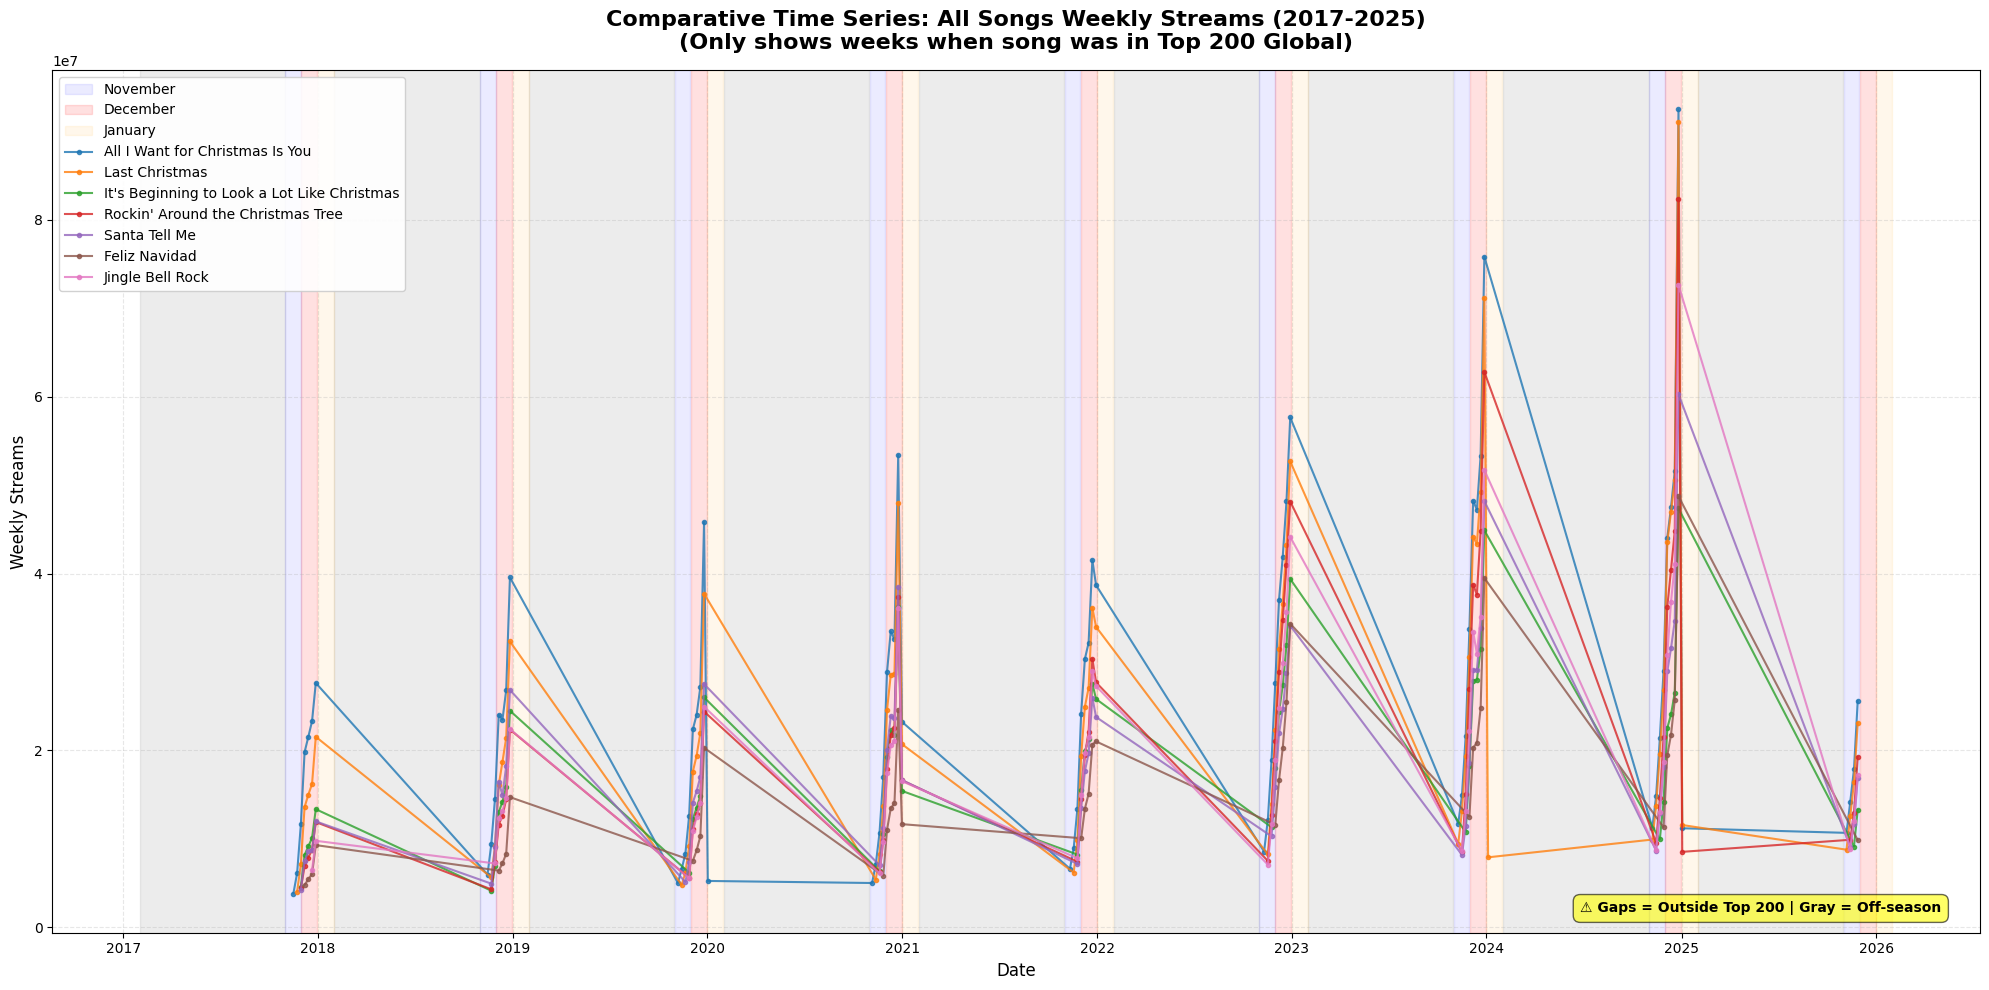

In [55]:
#Comparative time series, all songs overlayed
plt.figure(figsize=(20, 10))

for year in range(2017, 2026): # Mark OFF-SEASON periods (February to October) with gray background
    plt.axvspan(pd.Timestamp(f'{year}-02-01'), pd.Timestamp(f'{year}-10-31'), 
                color='gray', alpha=0.15, zorder=0) 

# Highlight Christmas season months (November, December, January)
for year in range(2017, 2026):
    # November
    plt.axvspan(pd.Timestamp(f'{year}-11-01'), pd.Timestamp(f'{year}-11-30'), 
                color='blue', alpha=0.08, zorder=1, label = 'November'if year == 2017 else '')
    # December
    plt.axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year}-12-31'), 
                color='red', alpha=0.12, zorder=1, label = 'December'if year == 2017 else '')
    # January
    plt.axvspan(pd.Timestamp(f'{year+1}-01-01'), pd.Timestamp(f'{year+1}-01-31'), 
                color='orange', alpha=0.08, zorder=1, label ='January'if year == 2017 else '')

# Plot all songs
for idx, song in enumerate(songs):
    song_data = df[df['track'] == song].sort_values('date')
    plt.plot(song_data['date'], song_data['streams'], 
             marker='o', markersize=3, linewidth=1.5, 
             label=song, color=colors[idx], alpha=0.8, zorder=3)

plt.title('Comparative Time Series: All Songs Weekly Streams (2017-2025)\n(Only shows weeks when song was in Top 200 Global)', 
          fontsize=16, fontweight='bold', pad=15) #title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Streams', fontsize=12)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')

# Add clear note about the off season
plt.text(0.98, 0.02, '⚠ Gaps = Outside Top 200 | Gray = Off-season', 
         transform=plt.gca().transAxes, fontsize=10, 
         ha='right', va='bottom', weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.6))

plt.tight_layout()
plt.show()

# 3. Seasonal Pattern of Christmas Cycle

------------------

In [56]:
christmas_season = df[df['week_of_year'].isin(list(range(45, 53)) + [1])].copy() #Filter data for Christmas season (weeks 45- 52 + week 1)
weekly_avg = christmas_season.groupby(['week_of_year', 'track'])['streams'].mean().reset_index()#grouping by week and song
#calculates the average for each song separately
weekly_avg_overall = christmas_season.groupby('week_of_year')['streams'].mean().reset_index() #Grouping by week of year
# all streams from all songs together

# Sort weeks properly (45-52, then 1 (1 week of january -> "IMPORTANT"))
week_order = list(range(45, 53)) + [1]
weekly_avg['week_of_year'] = pd.Categorical(weekly_avg['week_of_year'], categories=week_order, ordered=True)
weekly_avg = weekly_avg.sort_values('week_of_year') #Sorts the weekly_avg dataframe in ascending order of the column
weekly_avg_overall['week_of_year'] = pd.Categorical(weekly_avg_overall['week_of_year'], categories=week_order, ordered=True)
weekly_avg_overall = weekly_avg_overall.sort_values('week_of_year')#Sorts the weekly_avg_overall dataframe in ascending order of the column

print("Average streams by week during Christmas season:")
# Add formatted column with values in millions
weekly_avg_overall['streams_formatted'] = weekly_avg_overall['streams'].apply(lambda x: f"{x:.2e} ({x/1e6:.1f}M)")
print(weekly_avg_overall[['week_of_year', 'streams_formatted']])

Average streams by week during Christmas season:
  week_of_year streams_formatted
1           45   8.70e+06 (8.7M)
2           46   9.15e+06 (9.2M)
3           47  1.08e+07 (10.8M)
4           48  1.50e+07 (15.0M)
5           49  2.17e+07 (21.7M)
6           50  2.37e+07 (23.7M)
7           51  2.67e+07 (26.7M)
8           52  3.87e+07 (38.7M)
0            1   8.89e+06 (8.9M)


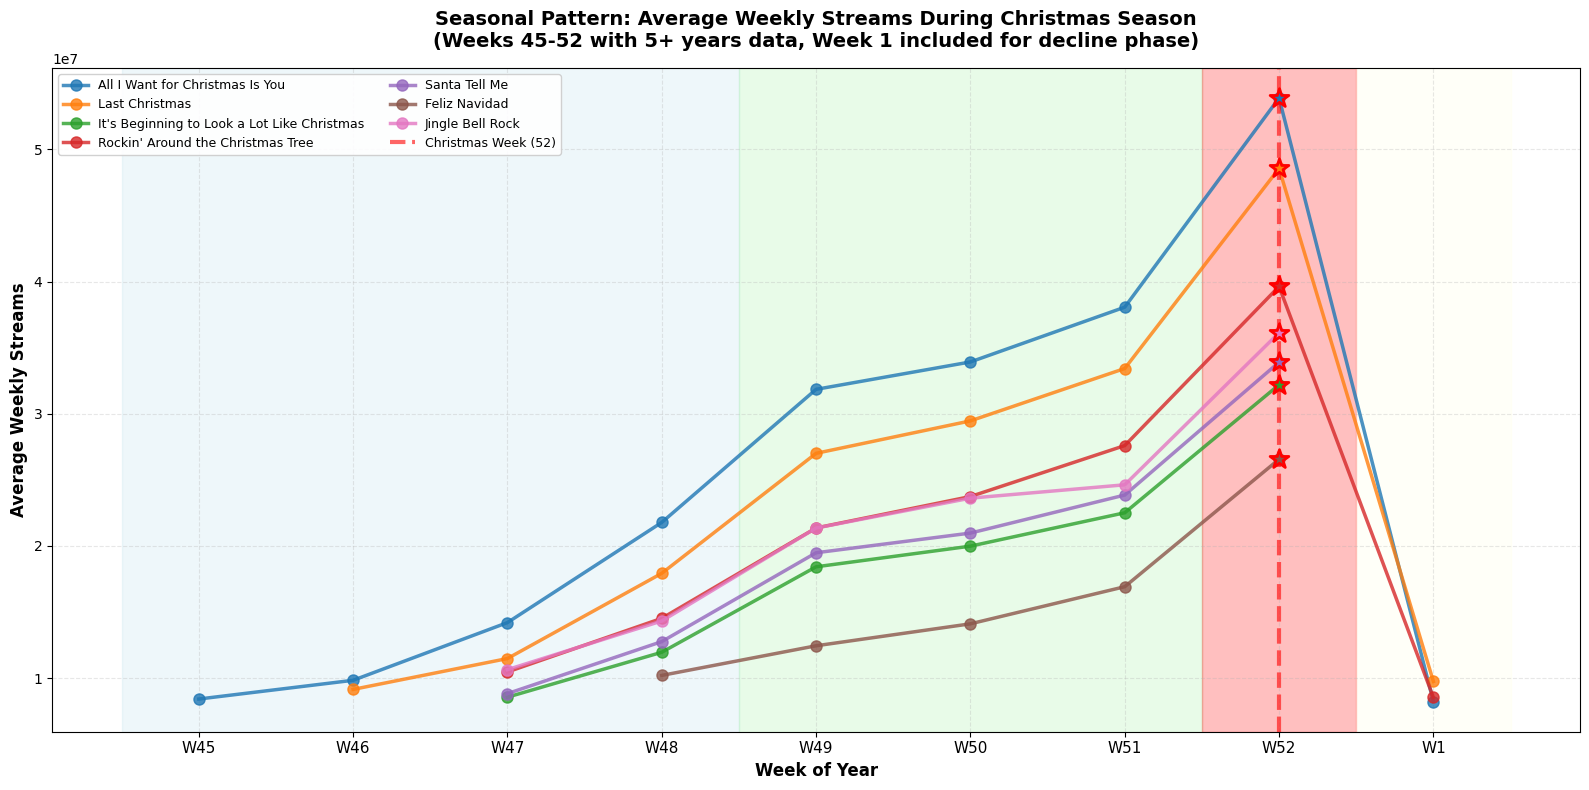

In [57]:
# Visualization: Average streams by week for each song (only weeks with data)
plt.figure(figsize=(16, 8))
for idx, song in enumerate(songs):  #for each song
    song_data = weekly_avg[weekly_avg['track'] == song] #sees the average per week for each song   
    # Filter out weeks with very few data points (likely incomplete)
    song_season = christmas_season[christmas_season['track'] == song]
    week_counts = song_season.groupby('week_of_year').size()
    # Only plot weeks that appear at least 5 times across all years
    valid_weeks_5plus = week_counts[week_counts >= 5].index
    week1_exists = 1 in week_counts.index and week_counts[1] >= 1 # BUT include week 1 if it has at least 1 data point (important for decline phase)
    if week1_exists:#If week 1 exists, adds it to the list of valid weeks; 
        valid_weeks = valid_weeks_5plus.union(pd.Index([1]))
    else:#otherwise, keeps only weeks with 5+ years of data.
        valid_weeks = valid_weeks_5plus
    
    song_data_filtered = song_data[song_data['week_of_year'].isin(valid_weeks)] #Filters song data, keeping only weeks that are in the valid_weeks list
    
    if len(song_data_filtered) > 0:
        x_positions = [week_order.index(w) for w in song_data_filtered['week_of_year']]
        plt.plot(x_positions, song_data_filtered['streams'], 
                 marker='o', markersize=8, linewidth=2.5, 
                 label=song, color=colors[idx], alpha=0.8)
        
        # Mark peak
        max_idx = song_data_filtered['streams'].idxmax()
        max_row = song_data_filtered.loc[max_idx]
        peak_week = max_row['week_of_year']
        peak_position = week_order.index(peak_week)
        plt.scatter(peak_position, max_row['streams'], 
                    color=colors[idx], s=200, marker='*', 
                    zorder=5, edgecolors='red', linewidths=2)

# Mark phases with vertical lines and background colors
plt.axvspan(-0.5, 3.5, color='lightblue', alpha=0.2)
plt.axvspan(3.5, 6.5, color='lightgreen', alpha=0.2)
plt.axvspan(6.5, 7.5, color='red', alpha=0.25)
plt.axvline(7, color='red', linewidth=3, linestyle='--', alpha=0.6, label='Christmas Week (52)')
plt.axvspan(7.5, 8.5, color='lightyellow', alpha=0.2)

plt.xticks(range(len(week_order)), [f'W{w}' for w in week_order], fontsize=11)
plt.xlabel('Week of Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Streams', fontsize=12, fontweight='bold')
plt.title('Seasonal Pattern: Average Weekly Streams During Christmas Season\n(Weeks 45-52 with 5+ years data, Week 1 included for decline phase)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.legend(loc='upper left', fontsize=9, ncol=2, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [58]:
week_order

[45, 46, 47, 48, 49, 50, 51, 52, 1]

In [59]:
weekly_avg['week_of_year'] = pd.Categorical(weekly_avg['week_of_year'], categories=week_order, ordered=True) #transforms the week_of_year column into ordered categorical
#meaning each week has a specific order. (45 to 52 then 1)
weekly_avg = weekly_avg.sort_values(['week_of_year', 'streams'], ascending=[True, False])#sorts first by week, then by number of streams.
pivot_table = weekly_avg.pivot(index='week_of_year', columns='track', values='streams')# transforms the dataframe from long format to wide format
#creating a table easier to analyze or plot.
pivot_table_formatted = pivot_table.applymap(lambda x: f'{x/1e6:.1f}M' if pd.notna(x) else '-')# Format values in millions

print("\nAverage streams by week for each song (in millions):")
pivot_table_formatted


Average streams by week for each song (in millions):


C:\Users\Admin\AppData\Local\Temp\ipykernel_11908\3164923838.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_formatted = pivot_table.applymap(lambda x: f'{x/1e6:.1f}M' if pd.notna(x) else '-')# Format values in millions


track,All I Want for Christmas Is You,Feliz Navidad,It's Beginning to Look a Lot Like Christmas,Jingle Bell Rock,Last Christmas,Rockin' Around the Christmas Tree,Santa Tell Me
week_of_year,,,,,,,
45,8.4M,-,-,-,9.4M,-,-
46,9.8M,-,-,8.3M,9.1M,8.9M,8.6M
47,14.2M,-,8.6M,10.6M,11.5M,10.5M,8.8M
48,21.8M,10.2M,11.9M,14.3M,17.9M,14.5M,12.8M
49,31.8M,12.4M,18.4M,21.4M,27.0M,21.4M,19.5M
50,33.9M,14.1M,20.0M,23.6M,29.5M,23.7M,21.0M
51,38.1M,16.9M,22.5M,24.6M,33.4M,27.6M,23.8M
52,53.9M,26.6M,32.2M,36.1M,48.6M,39.6M,33.9M
1,8.2M,-,-,-,9.7M,8.5M,-
